<a href="https://colab.research.google.com/github/bastiansosa/procesamiento-digital/blob/main/procesamientodigital11().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Descargar la imagen leaves.jpg desde el repositorio https://github.com/jorgevergara/PDI y utilice técnicas de procesamiento de imágenes que estime conveniente para segmentar las hojas más oscuras. Recuerde que debe eliminar todo rastro de tallo de las hojas.



In [ ]:
import numpy as np
from skimage import data 
import matplotlib.pylab as plt
import skimage.io as io
# https://raw.githubusercontent.com/jorgevergara/PDI/main/leaves.jpg

In [ ]:
imgcolor = io.imread("https://raw.githubusercontent.com/jorgevergara/PDI/main/leaves.jpg?raw=True")
imgray = io.imread("https://raw.githubusercontent.com/jorgevergara/PDI/main/leaves.jpg?raw=True", as_gray=True)


0.0

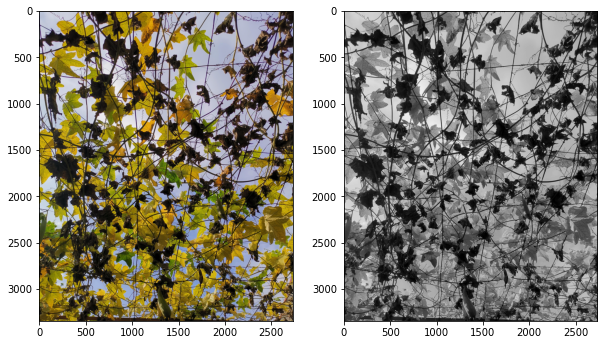

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(imgcolor)
ax[1].imshow(imgray, cmap="gray")

In [ ]:
imgray.max()

1.0

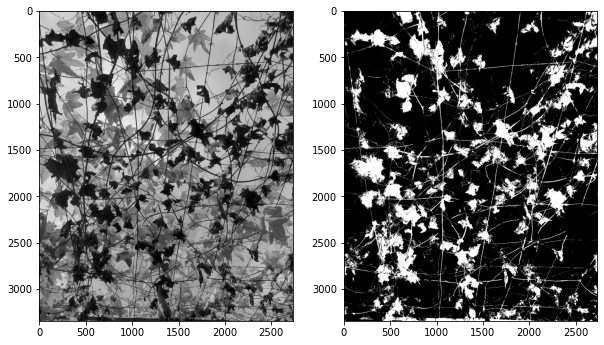

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(imgray,cmap="gray")
ax[1].imshow(imgray<0.15,cmap="gray") # buscamr todo los pixeles que el color o intensidad q sea menor a 0.15


In [ ]:
#  eliminar los rastros de tallos de las hojas (aplicar concepto de erosion )

f = np.ones((7,7)) # para eliminar las lineas de los tallos aplicamos erosion 



In [ ]:
def erosion (ima, kernel): # imagen y filtro 
  nfi,nci = ima.shape
  nfk,nck = kernel.shape
  res = np.zeros((nfi-nfk+1 ,nci-nck+1))
  for i in range(0,nfi-nfk+1):
    for j in range(0,nci-nck+1):
      temp = ima[i:i+nfk , j:j+nck] * kernel 
      if temp.sum() == kernel.sum():
        res[i,j] = 1
  return res



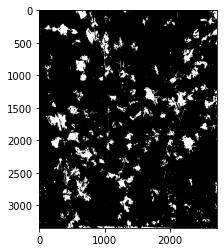

In [ ]:

im_binary = imgray < 0.15 
a = erosion(im_binary,f)
plt.imshow(a,cmap="gray")

In [ ]:
f2 = np.ones((5,5))
B = dilation(erosion(erosion(im_binary,f2),f2),f2) 

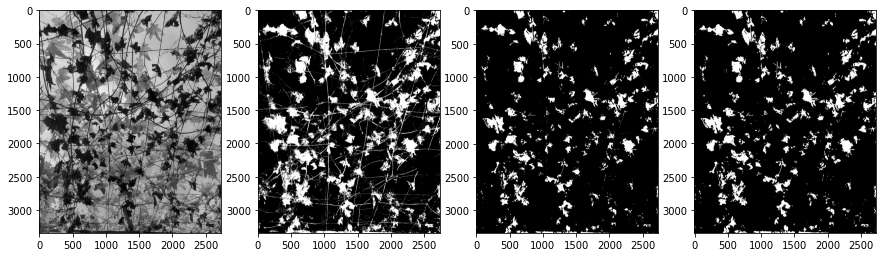

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(15,15))
ax[0].imshow(imgray,cmap="gray")
ax[1].imshow(im_binary,cmap="gray") 
ax[2].imshow(a,cmap="gray")
ax[3].imshow(B,cmap='gray')

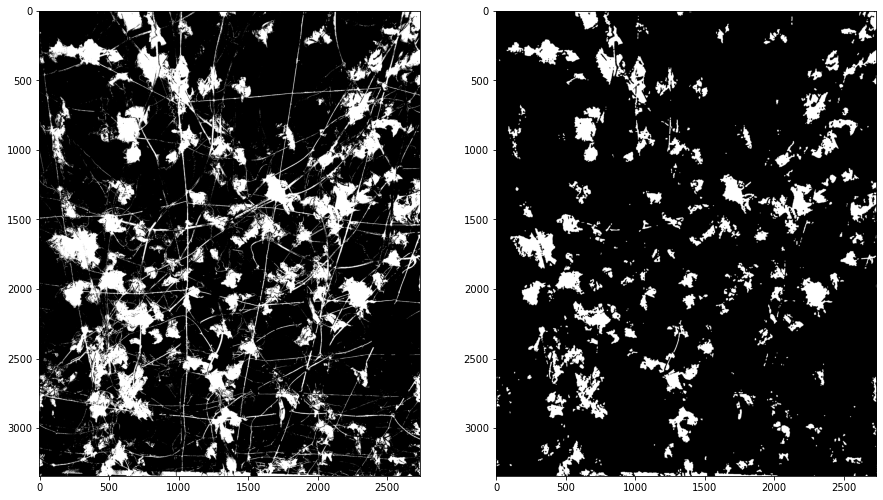

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(im_binary,cmap='gray')
ax[1].imshow(B,cmap='gray')


Desde la imagen coin desde from skimage import data obtenga lo siguiente

2.1. Encuentre el umbral óptimo para diferenciar todas las monedas con respecto al fondo.

In [ ]:
coins = data.coins()

In [ ]:
coins.max()

252

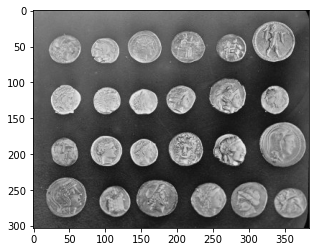

In [ ]:
plt.imshow(coins, cmap="gray")

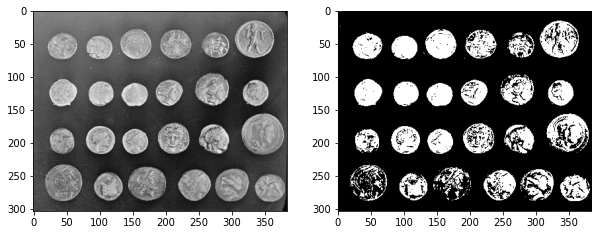

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(coins, cmap="gray")
axs[1].imshow(coins>140, cmap="gray")

In [ ]:
coins_binary = coins>140


array([[False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
from skimage.exposure import equalize_hist as EH

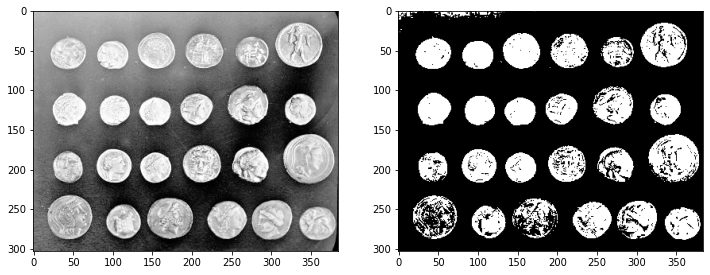

In [ ]:
coins_imp = EH(coins,256)
fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(coins_imp, cmap="gray")
ax[1].imshow(coins_imp>0.72, cmap="gray")

In [ ]:
coins_imp.max()

1.0

2.2) Utilizando el filtro canny (from skimage.feature import canny) detecte los bordes de las monedas. Compare su resultado con el filtro de deteccion de bordes visto en clases (sobel)

In [ ]:
from skimage.feature import canny

In [ ]:
coins_canny = canny(coins_binary)

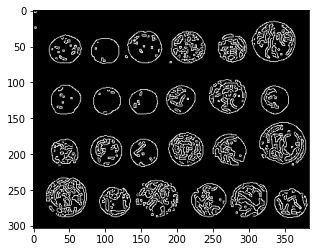

In [ ]:
plt.imshow(coins_canny, cmap="gray")

In [ ]:
from scipy import signal
signal.convolve(im_binary, f)

array([[ 8.81498733e-15,  9.19824765e-15,  7.66520638e-15, ...,
         3.00000000e+00,  2.00000000e+00,  1.00000000e+00],
       [ 1.53304128e-15,  1.53304128e-15,  2.29956191e-15, ...,
         6.00000000e+00,  4.00000000e+00,  2.00000000e+00],
       [ 9.19824765e-15,  6.89868574e-15,  1.07312889e-14, ...,
         9.00000000e+00,  6.00000000e+00,  3.00000000e+00],
       ...,
       [ 2.00000000e+00,  4.00000000e+00,  6.00000000e+00, ...,
        -4.59912383e-15, -6.13216510e-15, -1.07312889e-14],
       [ 2.00000000e+00,  4.00000000e+00,  6.00000000e+00, ...,
         4.59912383e-15,  3.06608255e-15,  3.06608255e-15],
       [ 1.00000000e+00,  2.00000000e+00,  3.00000000e+00, ...,
         2.29956191e-15,  2.29956191e-15,  7.66520638e-16]])

In [ ]:
Fx = np.array([[1,0,-1],
               [2,0,-2],
               [1,0,-1]])
Fy = np.array([[1,2,1],
               [0,0,0],
               [-1,-2,-1]])

Gx = signal.convolve2d(coins_binary, Fx)
Gy = signal.convolve2d(coins_binary, Fy)
G = 0.5*(Gx + Gy)

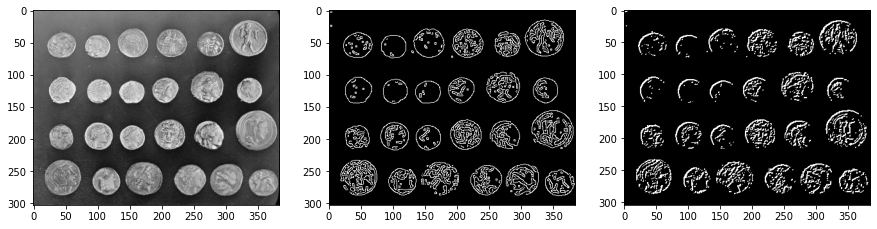

In [ ]:

fig, ax = plt.subplots(1,3,figsize=(15,10))
ax[0].imshow(coins, cmap="gray")
ax[1].imshow(coins_canny, cmap="gray")
ax[2].imshow(G>0.5, cmap="gray")

2.3) Utilice la función ndi.binary_fill_holes desde from scipy import ndimage as ndi para rellenar los huecos desde el ejercicio 2.2

In [ ]:
from scipy import ndimage as ndi

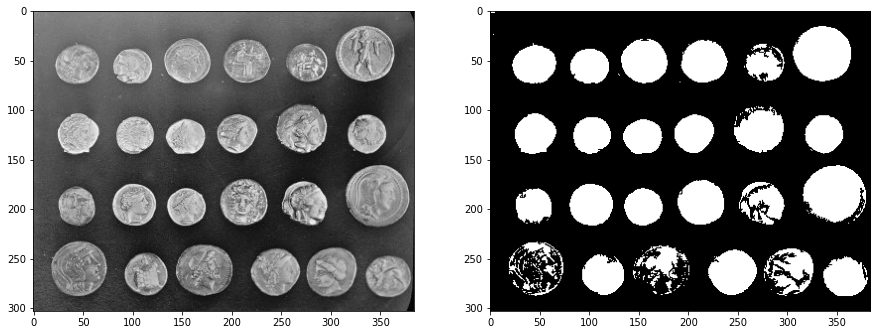

In [ ]:
aux = ndi.binary_fill_holes(coins_binary)
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(coins, cmap="gray")
ax[1].imshow(aux, cmap="gray")

In [ ]:
img_dilatada = dilation(aux, disk(5))
img_erosion = erosion(aux, disk(5))
img_final = img_dilatada*(1-img_erosion)


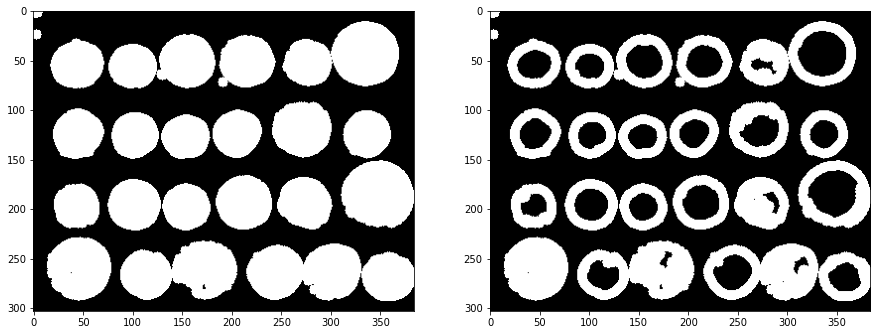

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(img_dilatada, cmap="gray")
ax[1].imshow(img_final, cmap="gray")